In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Charger l'image bruitée
img = cv2.imread("../t.jpeg", cv2.IMREAD_GRAYSCALE)


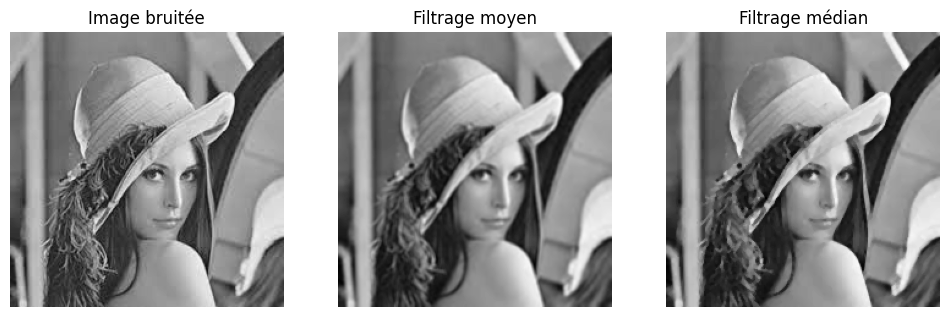

In [12]:
if img is None:
	print("Erreur : l'image 't.jpeg' n'a pas été trouvée ou ne peut pas être chargée.")
else:
	# Appliquer les filtres
	filtre_moyen = cv2.blur(img, (3,3))      # filtre moyen 3x3
	filtre_median = cv2.medianBlur(img, 3)   # filtre médian 3x3

	# Display results
	plt.figure(figsize=(12,6))
	plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Image bruitée"); plt.axis("off")
	plt.subplot(1,3,2); plt.imshow(filtre_moyen, cmap='gray'); plt.title("Filtrage moyen"); plt.axis("off")
	plt.subplot(1,3,3); plt.imshow(filtre_median, cmap='gray'); plt.title("Filtrage médian"); plt.axis("off")
	plt.show()


### **From scratch**

In [13]:
voisins=3

In [14]:
def filtreMoyenne(img):
        h,w = img.shape
        imgMoy= np.zeros(img.shape,img.dtype)
        for y in range(h):
                for x in range(w):
                        if y < voisins/2 or y > (h -voisins/2) or x < voisins/2 or x > (w-voisins/2) :
                              imgMoy[y,x] = img[y,x]  
                        else:
                                m = int(voisins/2) #marge bcs imgMoy[y,x] is in the middle
                                imgvoisins = img[y-m:y+m+1,x-m:x+m+1]
                                moy = 0
                                for yv in range(imgvoisins.shape[0]):
                                        for xv in range(imgvoisins.shape[1]):
                                                moy += int(imgvoisins[yv, xv])
                                moy /= voisins*voisins  # moy = sum / nbre de pixels 3*3
                                imgMoy[y,x] = moy
                                # imgMoy[y,x] = np.mean(imgvoisins)
        return imgMoy

In [15]:
def filtreMediane(img):
        h,w = img.shape
        imgMed= np.zeros(img.shape,img.dtype)
        for y in range(h):
                for x in range(w):
                        if y < voisins/2 or y > (h -voisins/2) or x < voisins/2 or x > (w-voisins/2) :
                              imgMed[y,x] = img[y,x]  
                        else:
                                m = int(voisins/2)
                                imgvoisins = img[y-m:y+m+1,x-m:x+m+1]
                                t = np.zeros((voisins*voisins),np.uint8) #array to store the neighbors
                                for yv in range(imgvoisins.shape[0]):
                                        for xv in range(imgvoisins.shape[1]):
                                                t[yv*voisins + xv] += imgvoisins[yv,xv]
                                t.sort()
                                imgMed[y,x] = t[int((voisins*voisins-1)/2)]
                                # imgMed[y,x] = np.median(imgvoisins)
        return imgMed


In [16]:
imgMoy = filtreMoyenne(img)
imgMed = filtreMediane(img)

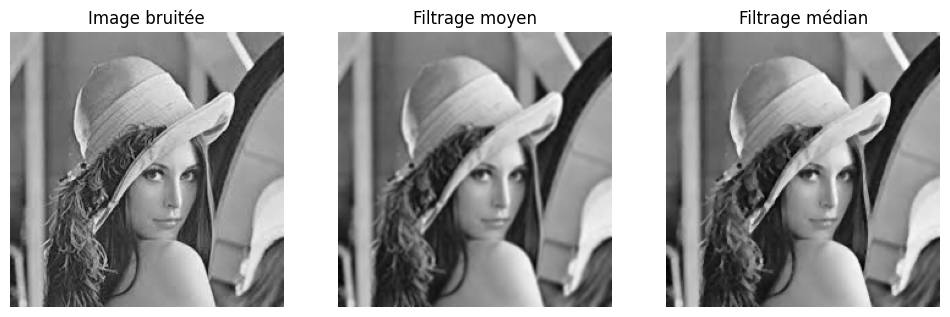

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Image bruitée"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(imgMoy, cmap='gray'); plt.title("Filtrage moyen"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(imgMed, cmap='gray'); plt.title("Filtrage médian"); plt.axis("off")
plt.show()

In [ ]:
cv2.imshow("image", img)

cv2.imshow("filtre moy", imgMoy)

cv2.imshow("filtre median", imgMed)

cv2.waitKey(0)

cv2.destroyAllWindows()